# ICPE 689 Data Science Fundamental for Energy II
Courtsey of Prof Jian Tao (https://pvfa.tamu.edu/staff/jian-tao/)

---

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="https://github.com/jtao/AdvancedML/blob/main/images/HandsonML.jpg?raw=1" width="200" /><img src="https://github.com/jtao/AdvancedML/blob/main/images/PDSH-cover.png?raw=1" width="200" /></span>

Some materials from Prof Aarti Singh CMU (https://www.cs.cmu.edu/~aarti/)

What is ML:
the use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyze and draw inferences from patterns in data. (From Google)

Data ---Algorithm---> Knowledge

Why is ML hot now?

*   Wide application (Amazon website recommendation, warehouse optimization, Google search, Banks, Uber etc)
*   Huge data set (Gene data, Image data, video data)
*   Improved ML performance
*   Improved data capture (Peta bytes, tera bytes)
*   Self customization for user or environment

Broad categories:


1.   Supervised learning <br>
     On labeled data, classification, regression etc
2.   Unsupervised learning <br>
     Find pattern from unlebeled data, clustering, dimensionality reduction etc
3.RL <br>
4.Graphical models













## Clustering Methods

* Clustering refers to a very broad set of techniques for **finding subgroups, or clusters**, in a data set.

* When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other.

* [Digits and Color Compression](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

* [Unsupervised Learning](https://colab.research.google.com/github/jtao/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

[<img src="https://github.com/jtao/AdvancedML/blob/main/images/colab-badge.png?raw=1" width="200"/>](https://colab.research.google.com/github/jtao/AdvancedML/blob/main/Clustering_methods.ipynb)

## K-Means

K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign each observation to exactly one of the K clusters.

<center><img src="https://github.com/jtao/AdvancedML/blob/main/images/KMeans.png?raw=1" width="300" /></center>

### K-means - Definition (1)
The K-means clustering procedure results from a simple and intuitive mathematical problem. We begin by defining some notation. Let $C_1 , \ldots , C_K$ denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:
1. $C_1 \cup C_2 \cup ... \cup C_K = \{1,...,n\}$. In other words, each observation belongs to at least one of the K clusters.
2. $C_k \cap C_k′ = \emptyset$ for all $k \neq k′$. In other words, the clusters are non-overlapping: no observation belongs to more than one cluster.

### K-means - Definition (2)

For instance, if the $i$th observation is in the $k$th cluster, then $i \in C_k$. The idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. The within-cluster variation for cluster $C_k$ is a measure $W (C_k)$ of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem
$$\underset{C_1, C_2 , ...,  C_K}{\text{minimize}} \Big\{\sum_{k=1}^K W(C_k)\Big\}$$
In words, this formula says that we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible.

### K-Means Algorithm

K-means **algorithm** is the most popular and yet simplest of all the clustering algorithms. Here is how it works:

1. Select the number of clusters  $k$ that you think is the optimal number.
2. Initialize $k$ points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations.
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).



### Implementation
This algorithm is easy to describe and visualize. We begin with a simple simulated example in which there truly are three clusters with totally 1500 points in the data:
$$X_1\sim \mathcal{N}\left(\begin{pmatrix}0\\0\end{pmatrix}, \begin{pmatrix}0.8^2&0\\0&0.8^2\end{pmatrix}\right),$$
$$ X_2\sim \mathcal{N}\left(\begin{pmatrix}2\\-1\end{pmatrix}, \begin{pmatrix}0.5^2&0\\0&0.5^2\end{pmatrix}\right),$$
$$X_3\sim \mathcal{N}\left(\begin{pmatrix}-1\\2\end{pmatrix}, \begin{pmatrix}0.2^2&0\\0&0.2^2\end{pmatrix}\right),$$

In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
blob_centers = np.array(
    [[0,  0],
     [2,  -1],
     [-1,  2]])
blob_std = np.array([0.8, 0.5, 0.2])
n_samples = 1500

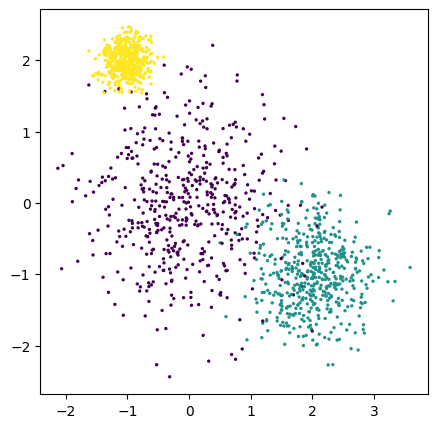

In [ ]:
# Let's begin by allocation 3 cluster's points
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=n_samples, centers=blob_centers,
                  cluster_std=blob_std, random_state=0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=2);

In [ ]:
X.shape

(1500, 2)

First, we need to import the `KMeans` function from module `sklearn.cluster`.

In [ ]:
from sklearn.cluster import KMeans

We now perform K-means clustering with K = 3.

In [ ]:
km_model = KMeans(n_clusters=3)
km_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

The cluster center coordinates  of the 3 clusters are contained in
`km_model.cluster_centers_`

In [ ]:
# print the center of each cluster
km_model.cluster_centers_

array([[-0.97197327,  1.93547287],
       [ 1.96973979, -0.97507081],
       [-0.12388474, -0.118382  ]])

The cluster assignments of the 1500 observations are contained in
`km_model.labels_`

In [ ]:
# print the subgroup of each sample
km_model.labels_

array([1, 0, 1, ..., 2, 1, 2], dtype=int32)

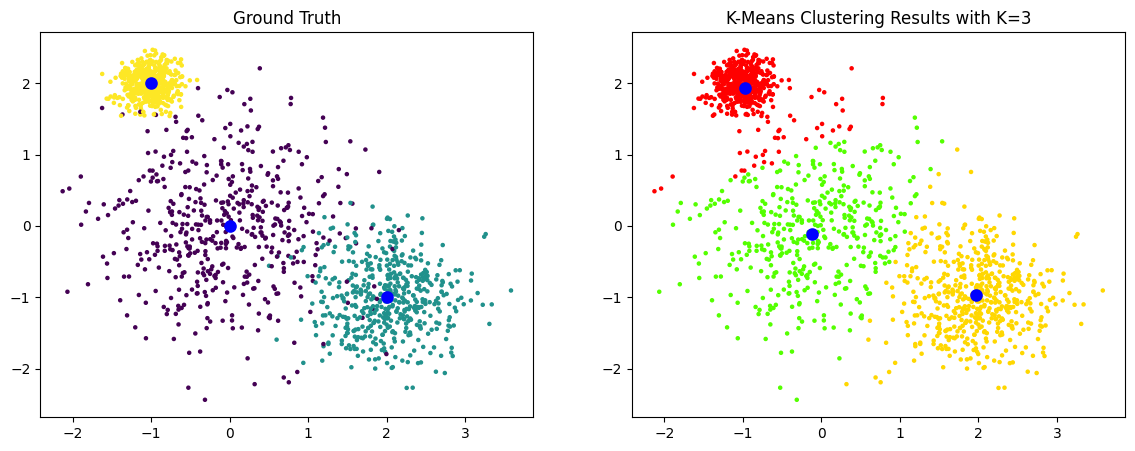

In [ ]:
# scatter plot: different color represents different subgroup
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
ax1.set_title('Ground Truth')
ax1.scatter(X[:,0], X[:,1], s=5, c=y);
ax1.scatter(blob_centers[:,0], blob_centers[:,1], marker='o', s=50, c='b', linewidth=2)

ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(X[:,0], X[:,1], s=5, c=km_model.labels_, cmap=plt.cm.prism)
ax2.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], marker='o', s=50, c='b', linewidth=2);

### Real data examples
#### Iris dataset

* The Iris data set can be imported from the sklearn module. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

* The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

* The below plot uses the first two features. See here for more information on this dataset.

* This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data # take the first two features as predictors
y_iris = iris.target

In [ ]:
X_iris.shape

(150, 4)

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
km_iris = KMeans(n_clusters = 3)
km_iris.fit(X_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Text(0.5, 1.0, 'K-Means Clustering Results with K=3')

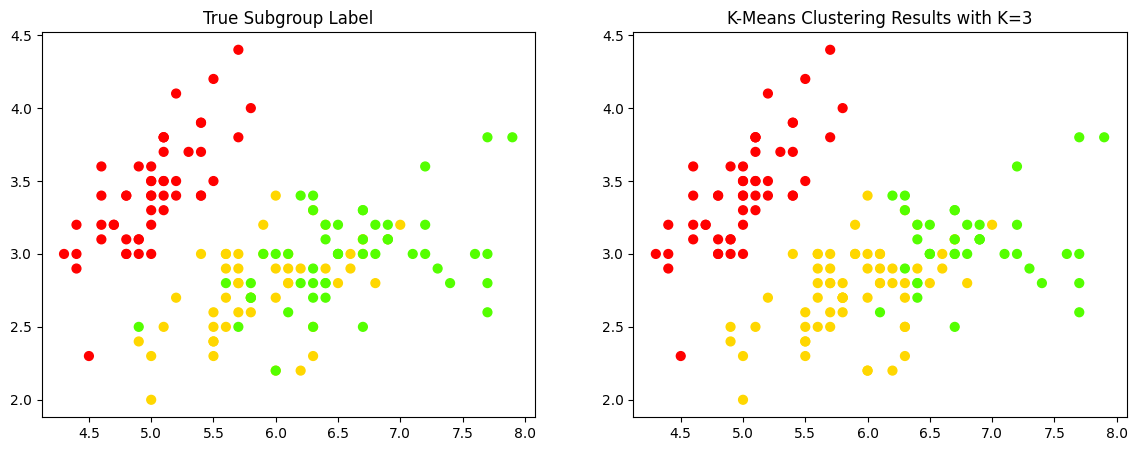

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X_iris[:,0], X_iris[:,1], s=40, c=y_iris, cmap=plt.cm.prism)
ax1.set_title('True Subgroup Label')

ax2.scatter(X_iris[:,0], X_iris[:,1], s=40, c=km_iris.labels_, cmap=plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K=3')

#### Mall Customers

 Source:
 https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Suppose you are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [ ]:
url = 'https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Mall_Customers.csv'
df = pd.read_csv(url)
df.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Dropping the 'gender' column for our three distance-based clustering techniques.


In [ ]:
X_market = df.drop(['Gender'], axis=1)
X_market.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


### The Elbow Method

Calculate the total Within-Cluster-Sum of Squared Errors (WCSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow. Total WCSS indicates how compact/good the clustering is.

1. The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
2. The WSS score is the sum of these Squared Errors for all the points.
3. Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.


In [ ]:
# We assume the max number of cluster is 10 and then count the clusters by averaging
wcss=[]
max_k = 11
for i in range(1,max_k):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_market[["Age","Spending Score (1-100)"]])
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

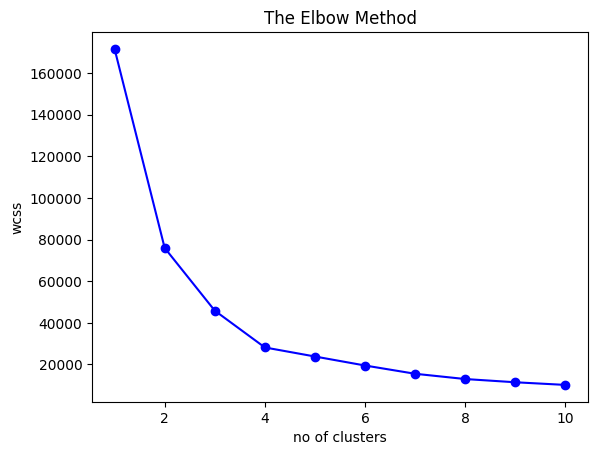

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,max_k), wcss, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# If you zoom out this curve then you will see that last elbow comes at k=4
# no matter what range we select, e.g. (1,21) also we will see the same behaviour, but if we chose bigger range,
# it can be a little difficult to visualize the ELBOW
# that is why we usually prefer range (1,11)
##Finally we got that k=4

#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_market[["Age","Spending Score (1-100)"]])

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


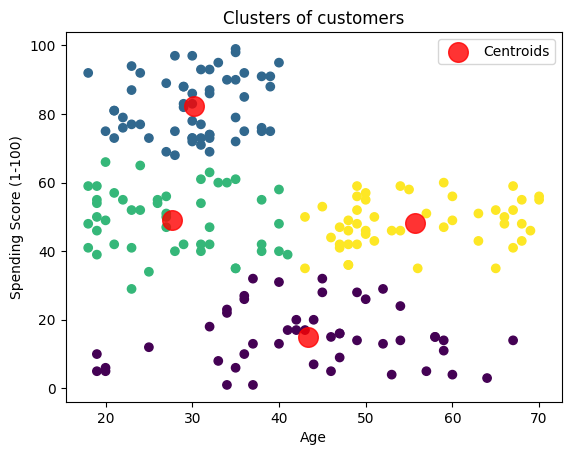

In [ ]:
plt.scatter(X_market["Age"], X_market["Spending Score (1-100)"], c=kmeansmodel.labels_)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], alpha=0.8, s = 200,  c="r", label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
kmeansmodel.score
plt.show()

### Real data example
#### Color Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

For example, consider the image shown in the following figure, which is from the Scikit-Learn datasets module (for this to work, you'll have to have the pillow Python package installed).

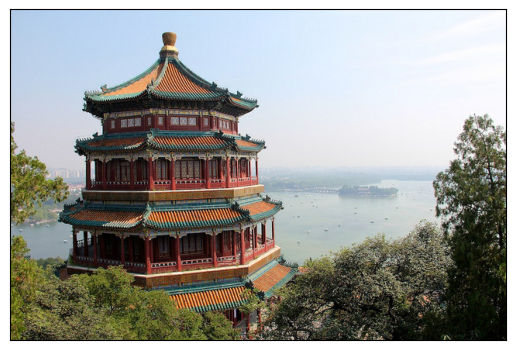

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Now let's reduce colors to just 16 colors, using a k-means clustering across the pixel space.

In [ ]:
# Run the Kmeans algorithm
km = KMeans(n_clusters=16)
km.fit(data)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:

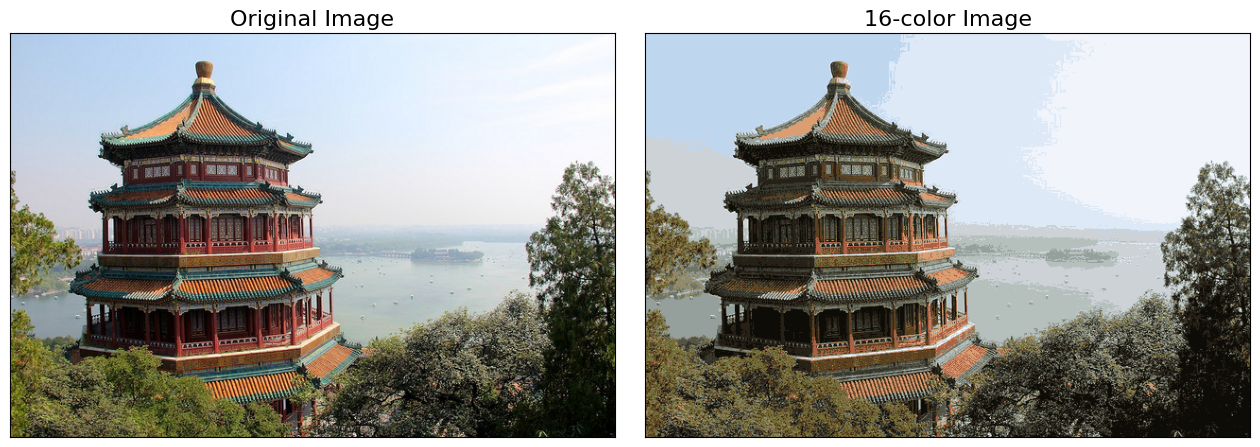

In [ ]:
china_recolored = X_compressed.reshape(china.shape)

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## Hierachical Clustering


<center><img src="https://github.com/jtao/AdvancedML/blob/main/images/Dendrogram.png?raw=1" width="600" /><br/>(credit: displayr.com)</center>

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.


<center><img src="https://github.com/jtao/AdvancedML/blob/main/images/hierarch.gif?raw=1" width="600" /><br/>(credit: dashee87.github.io/)</center>


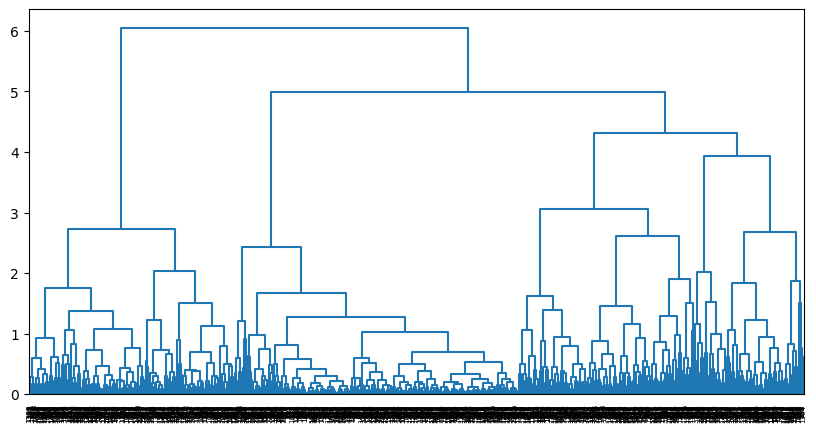

In [ ]:
# this cell is only used for present dendrogram, we will show how to implement later
from scipy.cluster import hierarchy
plt.figure(figsize=(10,5))
cluster = hierarchy.dendrogram(hierarchy.complete(X), color_threshold=0)

The figure is the dendrogram using the generated data $X$, each leaf of the dendrogram represents one of the 1500 observations from data $X$. When we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other. As we move higher up the tree, branches themselves fuse, either with leaves or other branches. The earlier (lower in the tree) fusions occur, the more similar the groups of observations are to each other. On the other hand, observations that fuse later (near the top of the tree) can be quite different.

In order to identify clusters on the basis of a dendrogram, we can make a horizontal cut across the dendrogram. The distinct sets of observations beneath the cut can be interpreted as clusters. The following are two examples.

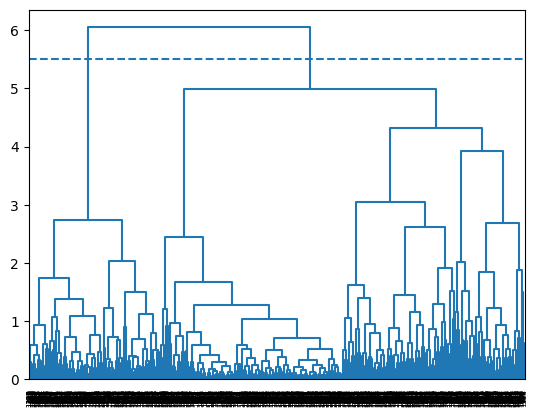

In [ ]:
cluster = hierarchy.dendrogram(hierarchy.complete(X), color_threshold=0)
plt.axhline(y=5.5, linestyle='--');

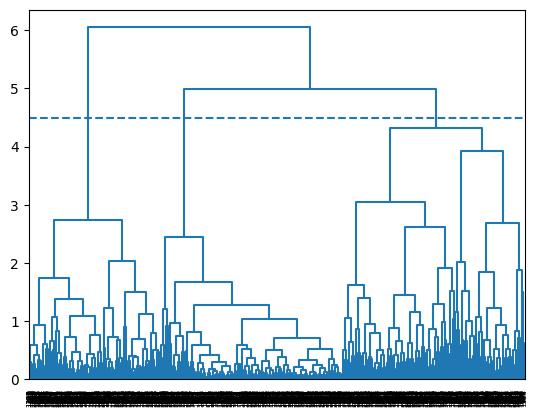

In [ ]:
cluster = hierarchy.dendrogram(hierarchy.complete(X), color_threshold=0)
plt.axhline(y=4.5, linestyle='--')

### Implement

* Agglomerative Clustering - recursively merges the pair of clusters that minimally increases a given linkage distance.
<center><img src="https://github.com/jtao/AdvancedML/blob/main/images/sphx_glr_plot_linkage_comparison_001.png?raw=1" width="400" /></center>

Comment: The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* `ward` minimizes the variance of the clusters being merged.

* `average` uses the average of the distances of each observation of the two sets.

* `complete` or `maximum` linkage uses the maximum distances between all observations of the two sets.

* `single` uses the minimum of the distances between all observations of the two sets.


More hints from Scikit-Learn website:

* `single` linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.

* `average` and `complete` linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.

* `Ward` is the most effective method for noisy data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Define a clustering model
# linkage has multiple options: 'ward', 'single', 'complete', 'average'
HC_model = AgglomerativeClustering(n_clusters=3, linkage ='ward')

In [ ]:
## Obtain prediction
pred_labels = HC_model.fit_predict(X)
pred_labels

array([2, 1, 2, ..., 0, 2, 0])

Text(0, 0.5, 'Euclidean distances')

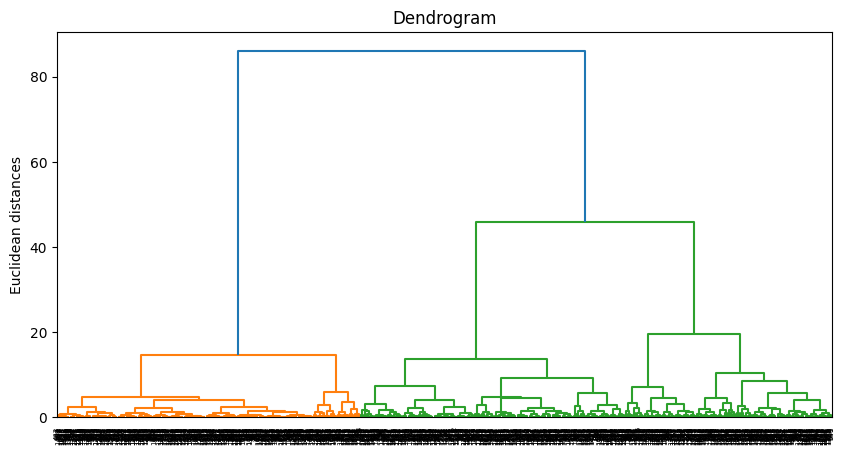

In [ ]:
## Plot the dendrogram
plt.figure(figsize=(10,5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')

### Real data example
#### Iris dataset

In [ ]:
pred_iris_labels = HC_model.fit_predict(X_iris)
pred_iris_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Hierachical Clustering Results with K=3')

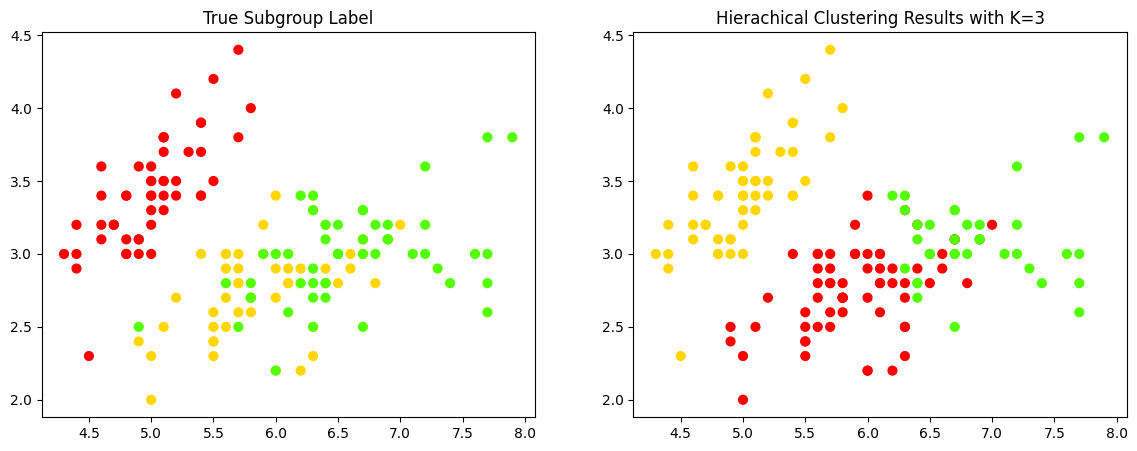

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X_iris[:,0], X_iris[:,1], s=40, c=y_iris, cmap=plt.cm.prism)
ax1.set_title('True Subgroup Label')

ax2.scatter(X_iris[:,0], X_iris[:,1], s=40, c=pred_iris_labels, cmap=plt.cm.prism)
ax2.set_title('Hierachical Clustering Results with K=3')

#### Mall customers

Text(0, 0.5, 'Euclidean distances')

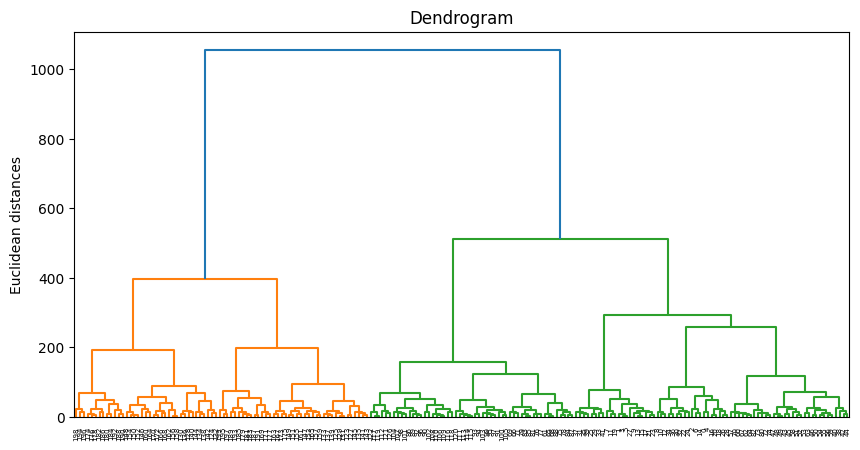

In [ ]:
plt.figure(figsize=(10,5))
HC_model = AgglomerativeClustering(n_clusters=5, linkage ='ward')
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_market, method = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')

## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.  The Gaussian mixture model has the form
$$f(x) = \sum_{m=1}^M \alpha_m \pi(x;\mu_m,\Sigma_m)$$
with mixing proportions $\alpha_m$, $\sum_m \alpha_m = 1$ and each Gaussian density has
a mean $\mu_m$ and covariance matrix $\Sigma_m$.

### Implement

We take the iris dataset as the example. Firsty, we import the function `GaussianMixture` from the module `sklearn.mixture`.

In [ ]:
from sklearn.mixture import GaussianMixture

Then we build a Gaussian Mixture Model and assign the number of clusters.

In [ ]:
GMM_model = GaussianMixture(n_components=3, random_state=42)

Next, we fit the observed data to `GMM_model` using the function `.fit(X)`

In [ ]:
GMM_model.fit(X_iris)

GaussianMixture(n_components=3, random_state=42)

Finally, we obtain the clusters of all observations.

In [ ]:
y_pre_gmm = GMM_model.predict(X_iris)
y_pre_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Real data example
#### Mall Customers

In [ ]:
GMM_model = GaussianMixture(n_components=5, random_state=42).fit(X_market)
labels_gmm = GMM_model.predict(X_market)
labels_gmm

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 1, 3, 1, 3,
       3, 3, 1, 4, 1, 3, 1, 3, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## DBSCAN

Source:
https://medium.com/odessa-ml-club/a-journey-to-clustering-introduction-to-dbscan-e724fa899b6f

https://scikit-learn.org/stable/modules/clustering.html#dbscan <br>
One of the best videos on internet about DBSCAN (https://www.youtube.com/watch?v=RDZUdRSDOok)<br>

If nested clustering is present k-means fails. We need something different. <br>
Probably most of us will agree that there are three clusters in the picture and that some points seem to not belong to any of them.

![jupyter](https://miro.medium.com/max/202/1*kIseB3RgeCcmTgsyGkHZ4A.png)

* Intuitively, the DBSCAN algorithm views clusters as areas of high density separated by areas of low density. As a result, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

* The central component to the DBSCAN is the concept of `core samples`, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

* There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense.

* Higher `min_samples` or `lower eps` indicate higher density necessary to form a cluster. More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample.

* `eps` can be calculated by grid search or kNN algorithm (plotting distance of k-th neighbour from each point and then taking elbow)
* `min_samples`determined by domain knowledge


* Always scale the data (in Python scaling is done by the command StandardScaler().fit_transform) before running dbscan







<center><img src="https://github.com/jtao/AdvancedML/blob/main/images/DBSCAN.png?raw=1" alt="drawing" width="600"/><br/>(credit: wikipedia.org)</center>

### Implement

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

#Scale the data before dbscan
X = StandardScaler().fit_transform(X)


In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


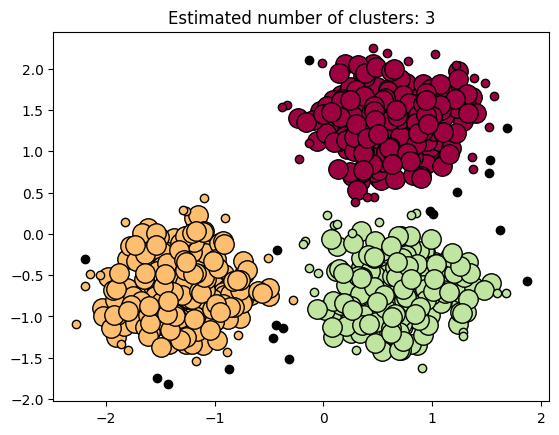

In [ ]:
## Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Clustering performance evaluation

Source:

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric.

### Rand index
#### Mathematical formulation
If $C$ is a ground truth class assignment and $K$ the clustering, let us
define $a$ and $b$ as:

- $a$, the number of pairs of elements that are in the same set
  in C and in the same set in K.

- $b$, the number of pairs of elements that are in different sets
  in C and in different sets in K.
  
$a+b$ can be considered as the number of agreements between $C$ and $K$.

The unadjusted Rand index is then given by:

$$\text{RI} = \frac{a + b}{C_2^{n_{samples}}}$$

where $C_2^{n_{samples}}$ is the total number of possible pairs
in the dataset.

$RI$ takes value between 0 to 1, 0 indicating that the two data clusterings do not agree on any pair of points and 1 indicating that the data clusterings are exactly the same. <br>
However, the Rand index does not guarantee that random label assignments
will get a value close to zero (esp. if the number of clusters is in
the same order of magnitude as the number of samples).

To counter this effect we can discount the expected $RI$, $E[\text{RI}]$, of
random labelings by defining the adjusted Rand index as follows:

$$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$$

The Rand Index may only yield a value between 0 and +1, but the adjusted Rand index can yield negative values if the index is less than the expected index.

#### Implement

Given the knowledge of the ground truth class assignments `labels_true` and our clustering algorithm assignments of the same samples `labels_pred`, the adjusted  Rand index is a function that measures the similarity of the two assignments, ignoring permutations:

In [ ]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

As with all clustering metrics, one can permute 0 and 1 in the predicted labels, rename 2 to 3, and get the same score:

In [ ]:
labels_pred = [1, 1, 0, 0, 3, 3]

metrics.adjusted_rand_score(labels_true, labels_pred)

0.24242424242424243

Furthermore, both `djusted_rand_score` is symmetric: swapping the argument does not change the scores. It can thus be used as consensus measures:

In [ ]:
metrics.adjusted_rand_score(labels_pred, labels_true)

0.24242424242424243

Perfect labeling is scored 1.0:

In [ ]:
labels_pred = labels_true[:]
metrics.adjusted_rand_score(labels_true, labels_pred)

1.0

### Homogeneity, completeness and V-measure
Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

#### Mathematical formulation
Homogeneity and completeness scores are formally given by:

$$ h = 1 - \frac{H(C|K)}{H(C)}$$

$$ c = 1 - \frac{H(K|C)}{H(K)}$$

where $H(C|K)$ is the **conditional entropy of the classes given
the cluster assignments** and is given by:

$$ H(C|K) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{n_{c,k}}{n}
          \cdot \log\left(\frac{n_{c,k}}{n_k}\right)$$

and $H(C)$ is the **entropy of the classes** and is given by:

$$ H(C) = - \sum_{c=1}^{|C|} \frac{n_c}{n} \cdot \log\left(\frac{n_c}{n}\right)$$

with $n$ the total number of samples, $n_c$ and $n_k$
the number of samples respectively belonging to class $c$ and
cluster $k$, and finally $n_{c,k}$ the number of samples
from class $c$ assigned to cluster $k$.


The **conditional entropy of clusters given class** $H(K|C)$ and the
**entropy of clusters** $H(K)$ are defined in a symmetric manner.

Rosenberg and Hirschberg further define **V-measure** as the **harmonic
mean of homogeneity and completeness**:

$$ v = 2 \cdot \frac{h \cdot c}{h + c}$$ <br>
$v$ takes value between 0 and 1, 1 being perfect lebeling.

Their harmonic mean called V-measure is computed as follows:

$$v = \frac{(1+\beta)\times homogeneity \times completeness}{\beta \times homogeneity + completeness}$$ <br>
$\beta$ is ratio of weight attributed to homogeneity vs completeness. If beta is greater than 1, completeness is weighted more strongly in the calculation. If beta is less than 1, homogeneity is weighted more strongly.

#### Implement

We can turn the  concept of **homogeneity** and **completeness**  as scores `homogeneity_score` and `completeness_score`. Both are bounded below by 0.0 and above by 1.0 (higher is better). Their harmonic mean called V-measure is computed by `v_measure_score`:

In [ ]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(metrics.homogeneity_score(labels_true, labels_pred) )

print(metrics.completeness_score(labels_true, labels_pred))

metrics.v_measure_score(labels_true, labels_pred)

0.6666666666666669
0.420619835714305


0.5158037429793889

beta defaults to a value of 1.0, but for using a value less than 1 for beta:

In [ ]:
metrics.v_measure_score(labels_true, labels_pred, beta=0.6)

0.5467344787062375

In [ ]:
metrics.v_measure_score(labels_true, labels_pred, beta=1.8)

0.48447946234141737